In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix

In [23]:
preds = pd.read_csv("preds_models.csv")

In [25]:
preds = preds.rename(columns={"P (popularity_class=1)": "Logistic Regression_pred",
                      "P (popularity_class=1) (right)": "Random Forest_pred",
                      "ensemble_pred": "Ensemble_pred"})

In [90]:
preds

,Logistic Regression_pred,popularity_class,Random Forest_pred,Ensemble_pred
0,0.195569,0,0.030,0.112784
1,0.159675,0,0.485,0.322337
2,0.187009,0,0.000,0.093505
3,0.319743,1,0.675,0.497371
4,0.319694,0,0.040,0.179847
...,...,...,...,...
1935,0.173301,0,0.005,0.089151
1936,0.121091,0,0.010,0.065545
1937,0.106984,0,0.010,0.058492
1938,0.201823,0,0.010,0.105912


In [37]:
def find_max_f1_threshold(precision, recall, thresholds):
    f1_scores = []
    for i in range(len(precision)):
        f1 = 2 / (1/(precision[i] + 1e-12) + 1/(recall[i] + 1e-12))
        f1_scores.append(f1)
    f1_scores = np.array(f1_scores)
    j = np.argmax(f1_scores)
    return j, thresholds[j] 

In [81]:
def find_optimal_threshold(precision, recall, thresholds, target_precision):
    mask = np.abs(precision[:-1] - target_precision) < 0.01
    index = np.argmax(recall[:-1][mask])
    max_recall = np.max(recall[:-1][mask])
    return thresholds[mask][index], max_recall

In [87]:
def plot_precision_recall_curve(pred_proba, labels, name, target_precision):
    precision, recall, thresholds = precision_recall_curve(labels, pred_proba)
    j, max_f1_threshold = find_max_f1_threshold(precision, recall, thresholds)
    optimal_threshold, max_recall = find_optimal_threshold(precision, recall, thresholds, target_precision)
    
    ap = average_precision_score(labels, pred_proba)
    plt.title(f"PR Curve {name}")
    plt.plot(recall, precision, linewidth=1.2,label="AUC = {:.2f}".format(ap))
    plt.plot(recall[j], precision[j], "ro", label="Max F1 point")
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.grid(True, color='w', linestyle='-', linewidth=1)
    plt.gca().patch.set_facecolor('0.92')
    plt.legend()
    plt.show()
    print(f"Max F1 Threshold {name}: {max_f1_threshold}")
    print(f"Optimal Thresholds for precision {target_precision}: {optimal_threshold} with Recall: {max_recall}")
    
    return max_f1_threshold    

In [88]:
preds.columns

Index(['Logistic Regression_pred', 'popularity_class', 'Random Forest_pred',
       'Ensemble_pred'],
      dtype='object')

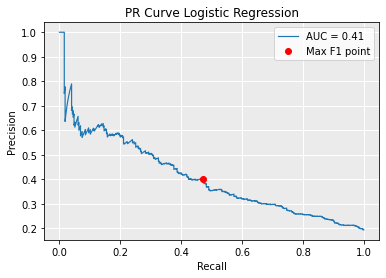

Max F1 Threshold Logistic Regression: 0.2381840515844548
Optimal Thresholds for precision 0.65: 0.6190762868567525 with Recall: 0.06133333333333333


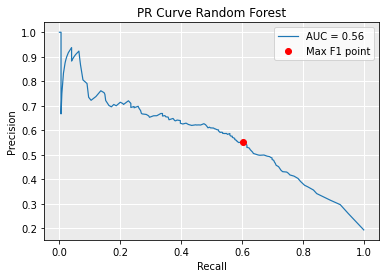

Max F1 Threshold Random Forest: 0.2199999988079071
Optimal Thresholds for precision 0.65: 0.4600000083446503 with Recall: 0.38666666666666666


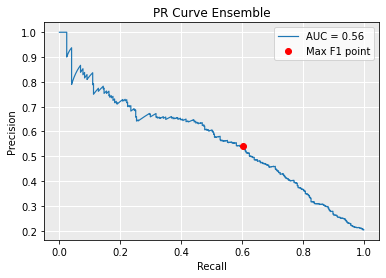

Max F1 Threshold Ensemble: 0.2397896048918873
Optimal Thresholds for precision 0.65: 0.3515227095031865 with Recall: 0.448


In [89]:
for model_name in ["Logistic Regression", "Random Forest", "Ensemble"]:
    plot_precision_recall_curve(preds[f"{model_name}_pred"], preds["popularity_class"], model_name, 0.65)

In [80]:
models_thresholds = {"Logistic Regression":0.62, "Random Forest":0.46, "Ensemble":0.35}

for name,threshold in models_thresholds.items():
    predicted_classes = (preds[f"{name}_pred"] > threshold).astype(int)
    conf_matrix = confusion_matrix(preds["popularity_class"], predicted_classes)
    print(f"Confusion Matrix {name}: \n{conf_matrix}")

Confusion Matrix Logistic Regression: 
[[1553   12]
 [ 353   22]]
Confusion Matrix Random Forest: 
[[1484   81]
 [ 230  145]]
Confusion Matrix Ensemble: 
[[1471   94]
 [ 207  168]]
